Import Necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Summary Statistics & Missing-Value Report

In [2]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")
print("Description of all numeric values : ")
df.describe()

Description of all numeric values : 


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
print("Check for missing values : ")
df.isna().sum()

Check for missing values : 


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
print("List of columns with >5% nulls : ")
null_percent = df.isna().mean() * 100  #calculating null values percentage
null_percent[null_percent > 5]         #extracting those with percentages greater than 5

List of columns with >5% nulls : 


Comments    100.0
dtype: float64

Outlier Detection & Basic Cleaning

In [6]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# --- Calculate z-scores ---

for c in key_cols:

    df[c + '_z'] = stats.zscore(df[c], nan_policy='omit')

# --- Identify outlier rows ---

outliers = df[(df[[c + '_z' for c in key_cols]].abs() > 3).any(axis=1)]

# --- Replace outliers in the main df with median values ---

for col in key_cols:

    median_val = df[col].median()

    # Find rows (by index) where that column's z-score is > 3

    mask = df[col + '_z'].abs() > 3

    # Replace those outlier values with the column median

    df.loc[mask, col] = median_val

print("Outliers replaced per column:")

print((df[[c + '_z' for c in key_cols]].abs() > 3).sum())



Outliers replaced per column:
GHI_z       2477
DNI_z       7586
DHI_z       2986
ModA_z      1604
ModB_z      2041
WS_z        3967
WSgust_z    3665
dtype: int64


In [7]:
# There are no missing values on those key_cols
df[key_cols] = df[key_cols].apply(lambda x: x.fillna(x.median()))
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,GHI_z,DNI_z,DHI_z,ModA_z,ModB_z,WS_z,WSgust_z
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532243,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105


In [8]:
df.to_csv('../data/sierraleone-bumbuna_clean.csv', index=False)


Time Series Analysis

c:\Users\mihret.mekbebe\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


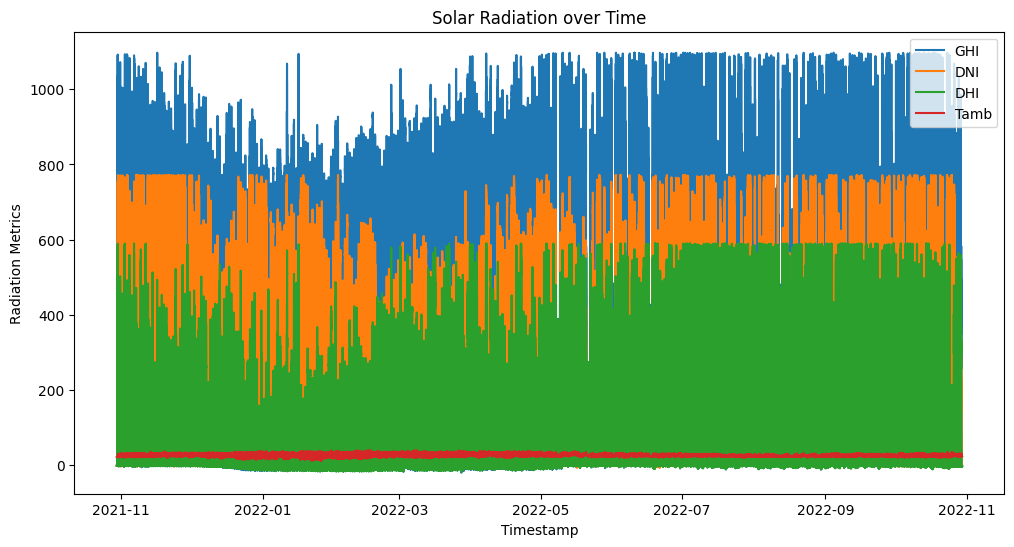

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

# Line plots of key metrics
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.legend()
plt.title('Solar Radiation over Time')
plt.xlabel('Timestamp')
plt.ylabel('Radiation Metrics')
plt.show()


C:\Users\mihret.mekbebe\AppData\Local\Temp\ipykernel_8584\4108571805.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Timestamp').resample('M').mean()


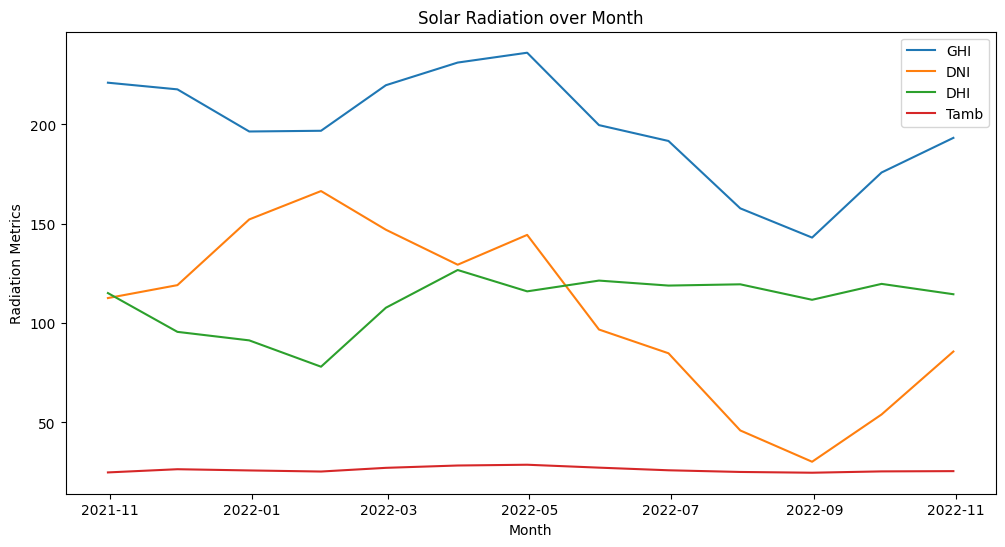

In [10]:
df_monthly = df.set_index('Timestamp').resample('M').mean()

df_monthly = df_monthly.reset_index()
# Line plots of key metrics
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Timestamp'], df_monthly['GHI'], label='GHI')
plt.plot(df_monthly['Timestamp'], df_monthly['DNI'], label='DNI')
plt.plot(df_monthly['Timestamp'], df_monthly['DHI'], label='DHI')
plt.plot(df_monthly['Timestamp'], df_monthly['Tamb'], label='Tamb')
plt.legend()
plt.title('Solar Radiation over Month')
plt.xlabel('Month')
plt.ylabel('Radiation Metrics')
plt.show()


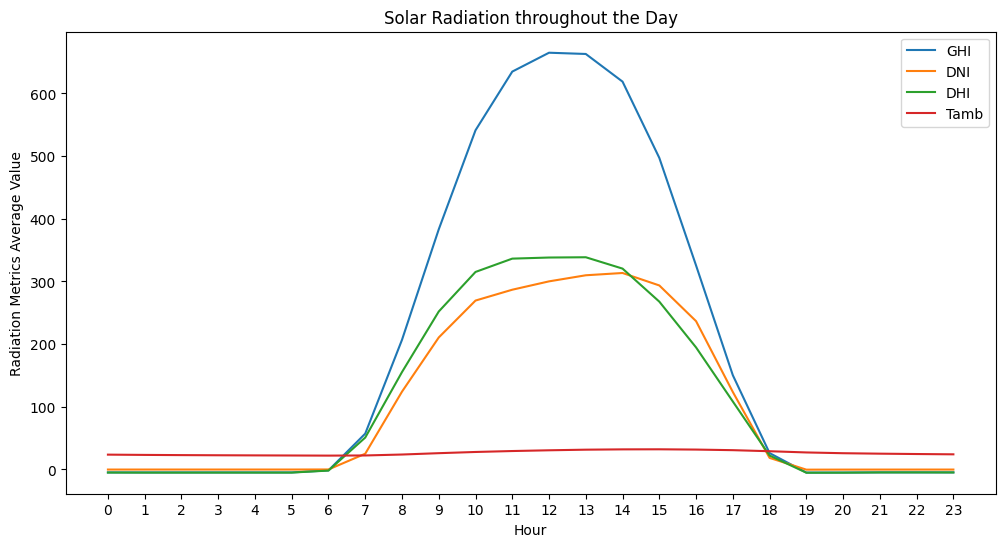

In [11]:

# Extract the hour from each timestamp
df['hour'] = df['Timestamp'].dt.hour

# Average all measurements for each hour of the day
hourly_pattern = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_pattern.index, hourly_pattern['GHI'], label='GHI')
plt.plot(hourly_pattern.index, hourly_pattern['DNI'], label='DNI')
plt.plot(hourly_pattern.index, hourly_pattern['DHI'], label='DHI')
plt.plot(hourly_pattern.index, hourly_pattern['Tamb'], label='Tamb')
plt.xticks(range(0, 24))
plt.xlabel('Hour')
plt.ylabel('Radiation Metrics Average Value')
plt.title('Solar Radiation throughout the Day')
plt.legend()
plt.show()
 

Cleaning Impact

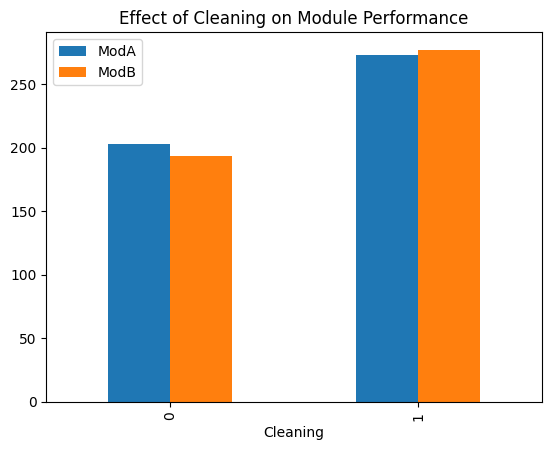

In [12]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on Module Performance')
plt.show()


Correlation & Relationship Analysis

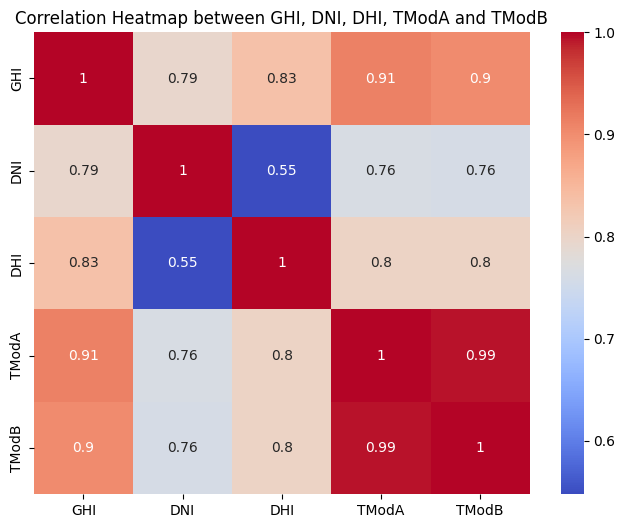

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between GHI, DNI, DHI, TModA and TModB')
plt.show()


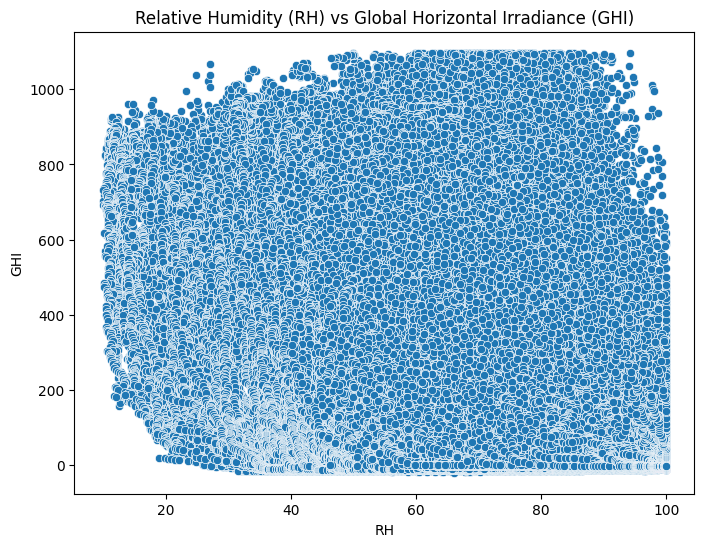

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)')
plt.show()


Wind & Distribution Analysis

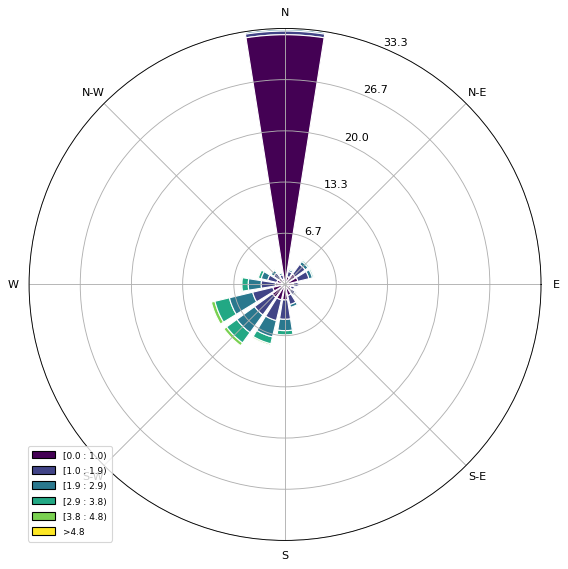

In [15]:
#!pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


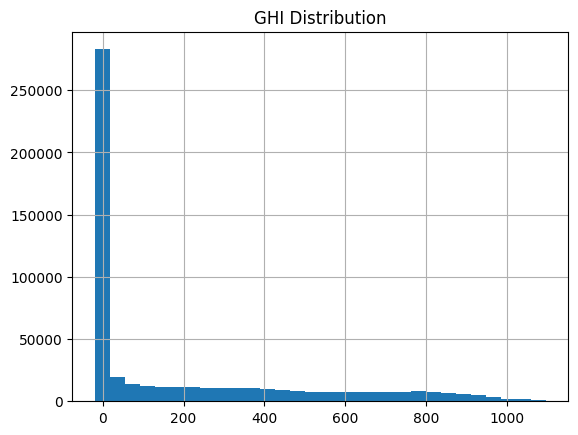

In [16]:
df['GHI'].hist(bins=30)
plt.title('GHI Distribution')
plt.show()


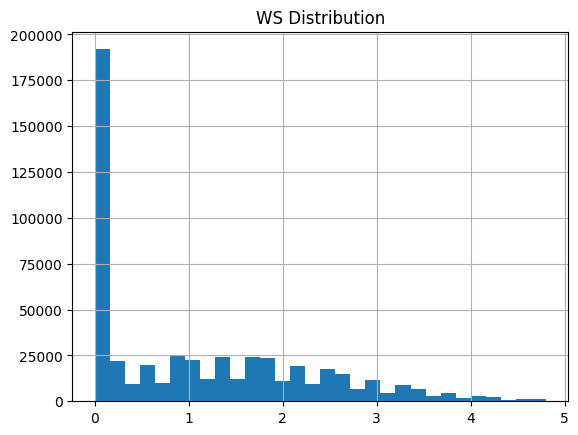

In [17]:
df['WS'].hist(bins=30)
plt.title('WS Distribution')
plt.show()


Temperature Analysis

c:\Users\mihret.mekbebe\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


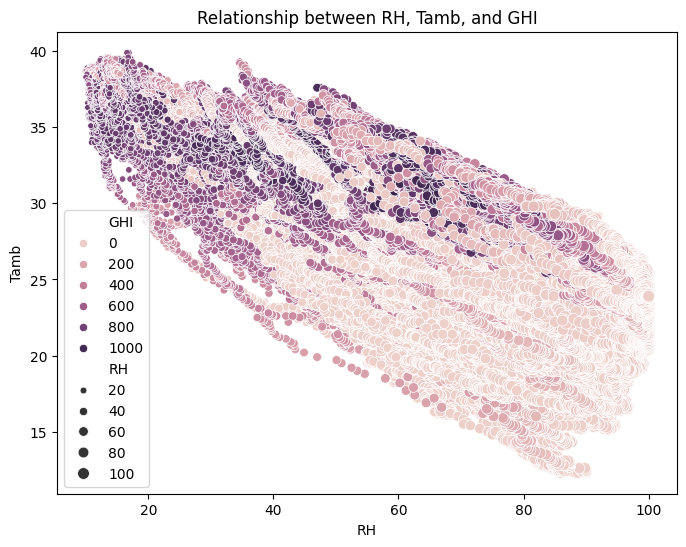

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH', y='Tamb', hue='GHI', size='RH', data=df)
plt.title('Relationship between RH, Tamb, and GHI')
plt.show()


Bubble Chart

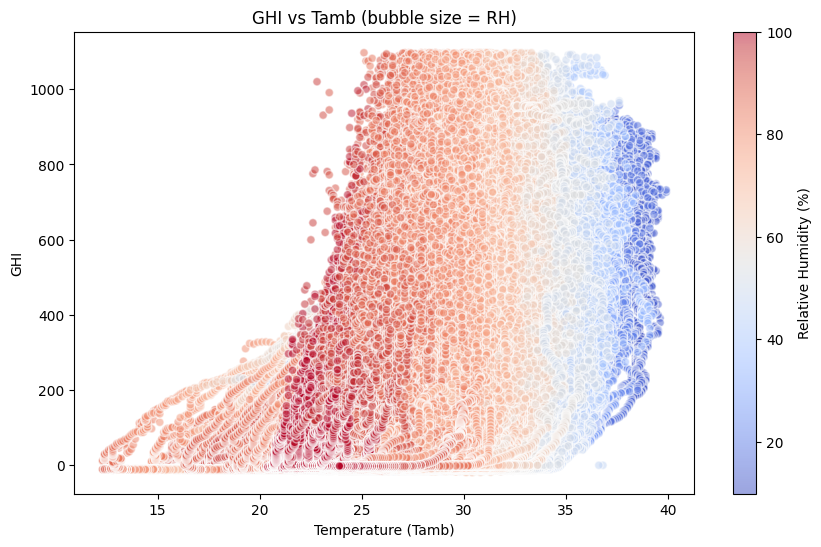

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], c=df['RH'], alpha=0.5,  cmap='coolwarm', edgecolors='w')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (bubble size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.show()
